In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
df = pd.read_csv('bank_marketing_train.csv')
df.head()

C:\Users\loganlv\AppData\Local\Temp\ipykernel_4116\1299749528.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,72,retired,married,basic.4y,no,no,no,telephone,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
1,30,admin.,single,university.degree,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,no
2,31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
3,37,admin.,married,high.school,no,yes,yes,cellular,nov,mon,1,999,0,nonexistent,-3.4,92.649,-30.1,0.722,5017.5,no
4,53,unemployed,divorced,basic.9y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [2]:
df.iloc[:,0] = df.iloc[:,0].astype('float64')
df_clean = df.iloc[:, :].loc[(df['previous'] == 0) | ((df['pdays'] != 999) & (df['poutcome'] != 'nonexistent'))]

C:\Users\loganlv\AppData\Local\Temp\ipykernel_4116\1153588090.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0] = df.iloc[:,0].astype('float64')


In [3]:
X = df_clean.copy()
y = X.pop('y')
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
y, _ = y.factorize()
discrete_features = X.dtypes == 'int64'
print(discrete_features)

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool


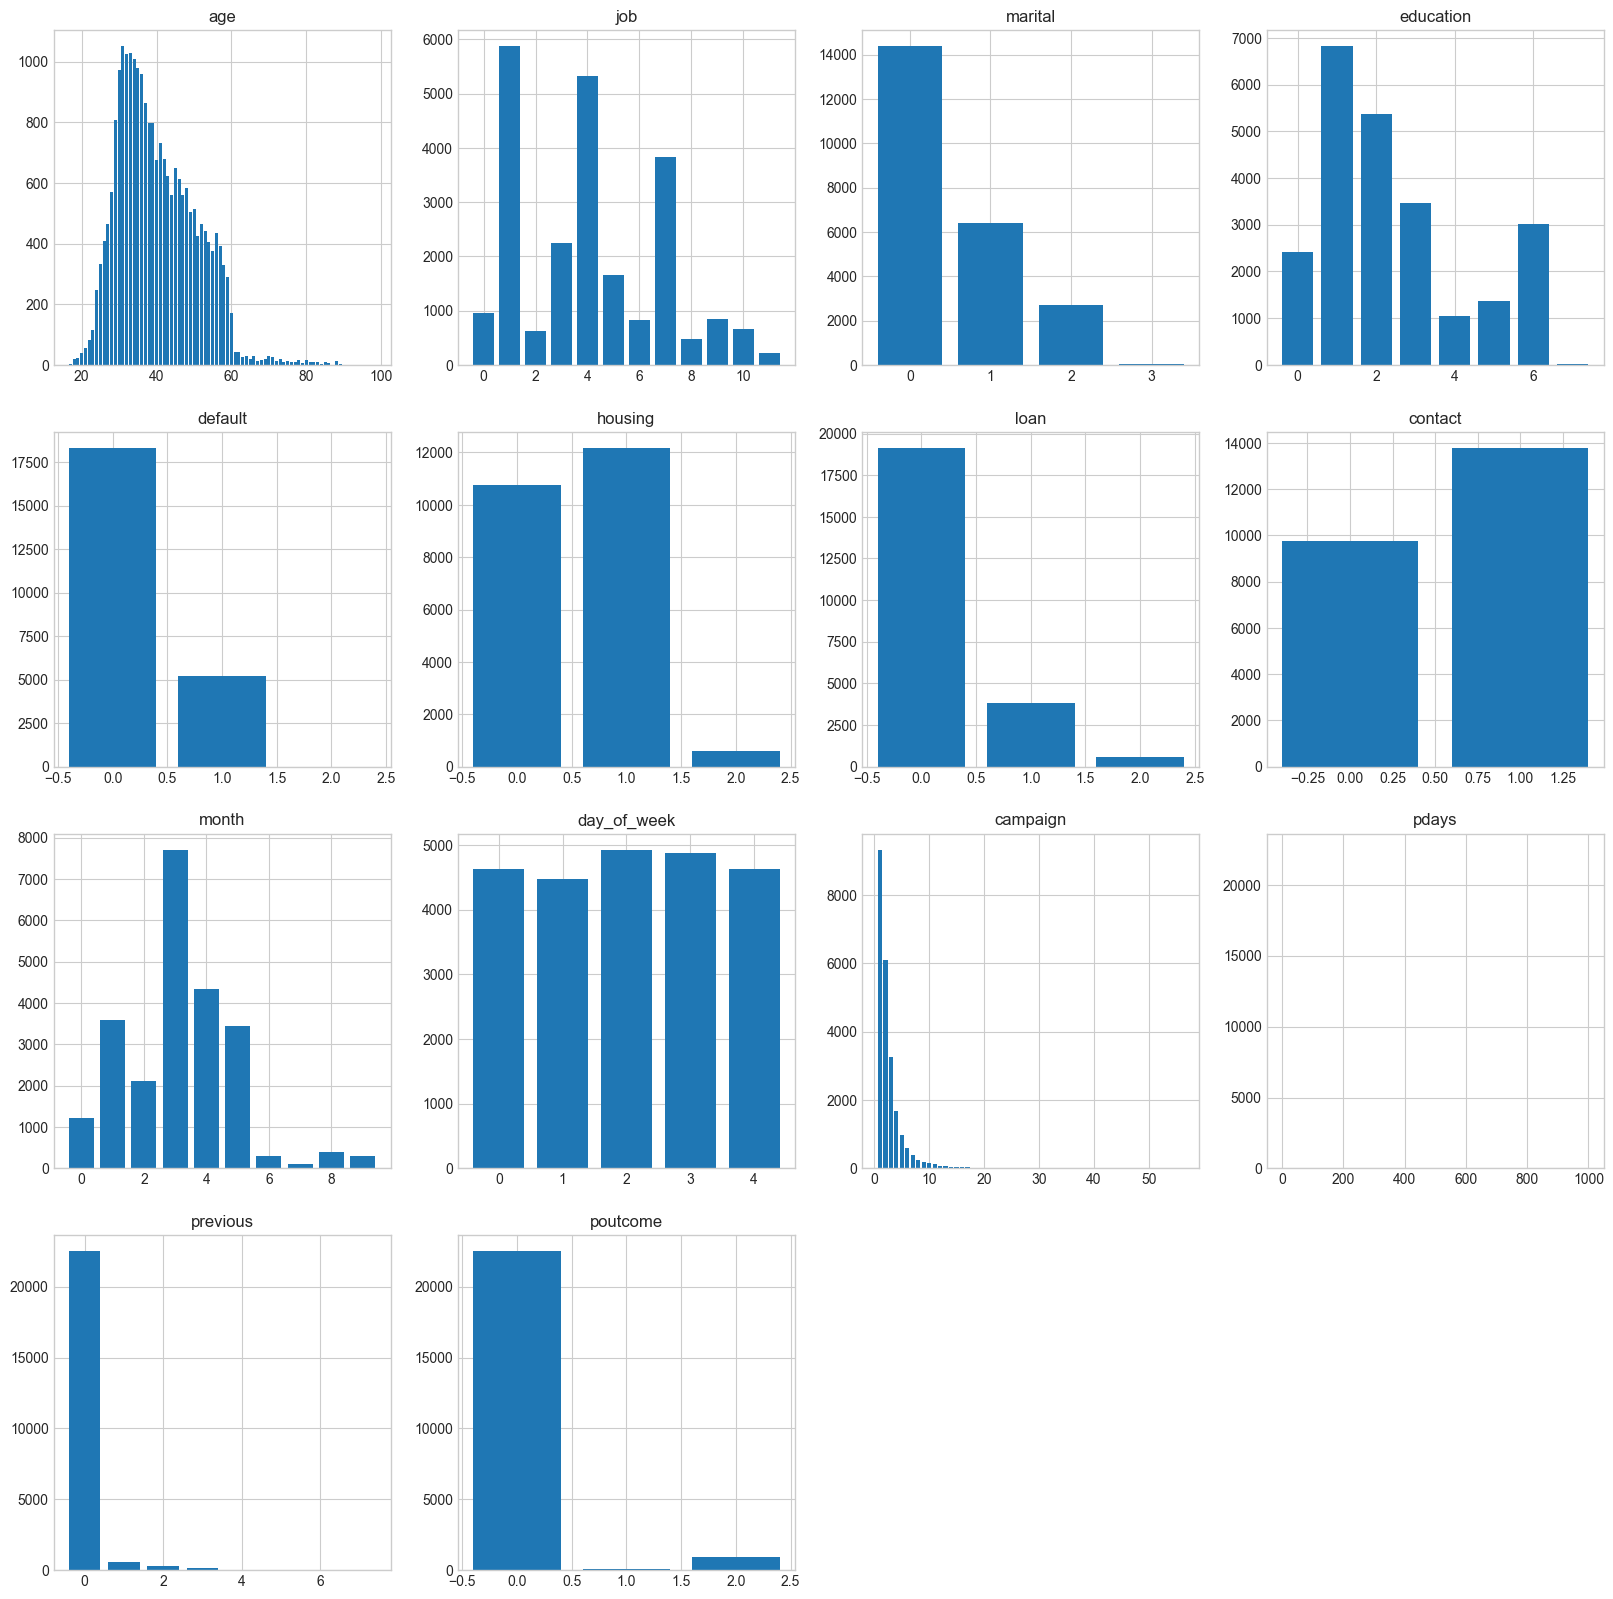

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
X_discrete = X.iloc[:, :14]
plt.figure(figsize=(20, 20))
for i in range(14):
    temp_series = X_discrete.iloc[:, i]
    vc = temp_series.value_counts()
    plt.subplot(4, 4, i+1)
    plt.bar(vc.index, vc.values)
    plt.title(discrete_features.index[i])

In [6]:
from sklearn.feature_selection import mutual_info_regression

# discrete_features = []
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

euribor3m         0.086981
cons.price.idx    0.083316
nr.employed       0.073188
cons.conf.idx     0.071941
emp.var.rate      0.057633
pdays             0.036029
previous          0.035938
poutcome          0.034543
month             0.031215
job               0.020240
contact           0.015269
age               0.013242
default           0.007518
campaign          0.004596
day_of_week       0.003689
education         0.002624
marital           0.001892
loan              0.000000
housing           0.000000
Name: MI Scores, dtype: float64

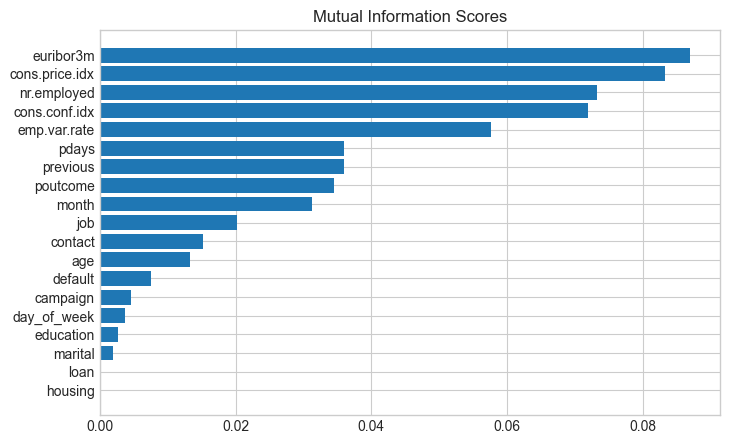

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [8]:
X = X.drop(['day_of_week'], axis=1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,72.0,0,0,0,0,0,0,0,0,1,999,0,0,-1.8,93.075,-47.1,1.453,5099.1
1,30.0,1,1,1,0,1,0,1,1,1,999,0,0,-1.7,94.027,-38.3,0.886,4991.6
2,31.0,2,0,1,0,1,0,1,1,4,999,0,0,1.4,93.444,-36.1,4.966,5228.1
3,37.0,1,0,2,0,1,1,1,2,1,999,0,0,-3.4,92.649,-30.1,0.722,5017.5
4,53.0,2,2,3,1,0,0,0,3,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0


In [9]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(X.shape, y.shape)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape, y_res.shape)
X_res['y'] = y_res
X_res.head()
X_res.to_csv('unnormalized_train.csv')

(23533, 18) (23533,)
(41554, 18) (41554,)
